# Table of Contents
 <p><div class="lev1 toc-item"><a href="#奇异值分解SVD" data-toc-modified-id="奇异值分解SVD-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>奇异值分解SVD</a></div><div class="lev2 toc-item"><a href="#奇异值分解可以从三个方面理解" data-toc-modified-id="奇异值分解可以从三个方面理解-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>奇异值分解可以从三个方面理解</a></div><div class="lev2 toc-item"><a href="#降维的例子" data-toc-modified-id="降维的例子-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>降维的例子</a></div>

# 奇异值分解SVD

$$A_{mn} = U_{mm} S_{mn} V_{nn}^T$$

## 奇异值分解可以从三个方面理解

- 奇异值分解是一种去除原始数据相互之间的相关性的一种方法，并把原始数据相互的关系暴露出来；   
- 奇异值分解会识别出数据每一维度的变化程度(Variation)，按照变化程度排列原始数据的维度；   
- 奇异值分解可以用来降维，在更小维度的空间中表示数据，并尽可能保留更多的原始信息；(可用用来做数据压缩)   

## 降维的例子

In [1]:
#coding=utf-8

import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread

%matplotlib inline

In [2]:
def rgb2gray(rgb):
    '''
    RGB 格式转为灰度值
    '''
    r,g,b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [3]:
img = imread('judy.jpg')

In [4]:
img.shape
# 三维数组r g b
# 这张照片有516多列的像素点构成,但是大部分地方都是白色的，相互没有什么差别，
# 也就是说图像中有很多列都是相互线性相关的，这些列向量对我们接受图像信息没有更大的帮助

(777, 516, 3)

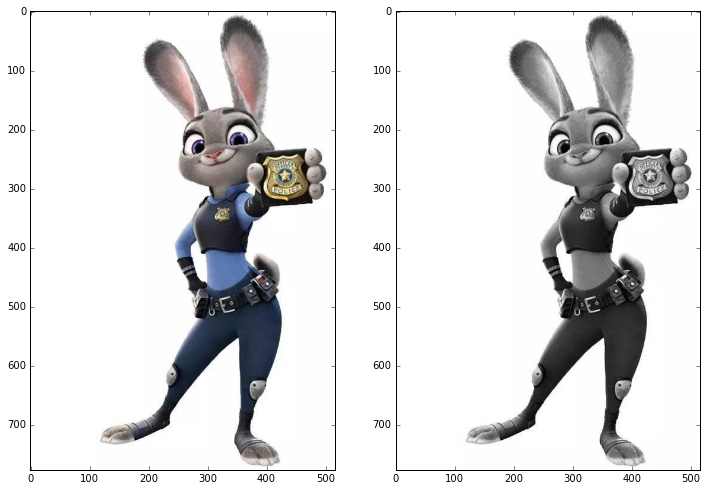

In [5]:
plt.figure(figsize=(12,9))
plt.subplot(1,2,1)
plt.imshow(img)
img = rgb2gray(img)
plt.subplot(1,2,2)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [6]:
img.shape
# 二维数组gray
# 这张照片有516多列的像素点构成,但是大部分地方都是白色的，相互没有什么差别，
# 也就是说图像中有很多列都是相互线性相关的，这些列向量对我们接受图像信息没有更大的帮助

(777, 516)

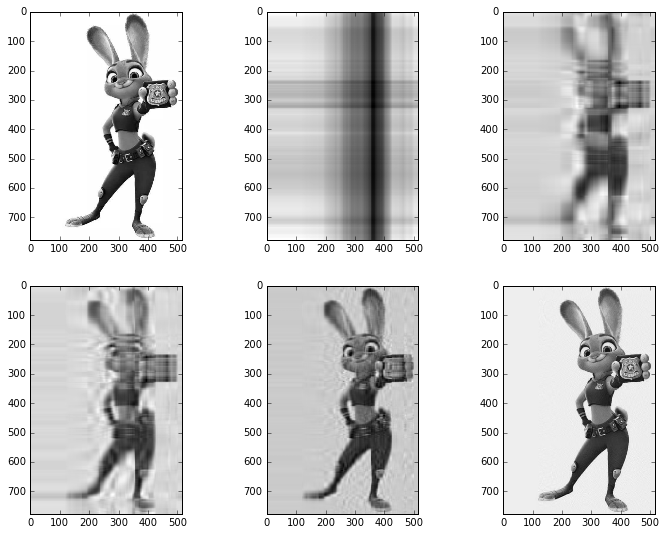

In [7]:
plt.figure(figsize=(12,9))
plt.subplot(2,3,1)
plt.imshow(img,cmap=plt.cm.gray)
U,s, V = np.linalg.svd(img)

# 吧向量s改成矩阵形式
S = np.zeros((img.shape))
S[:len(s), :len(s)] = np.diag(s)

# 画图
i = 2
# 分别测试使用前1，5，10，。。。列向量估计原图的效果
for k in [1, 5, 10, 20, 100]:
    img_trans = np.dot(U[:,:k], np.dot(S[:k,:k], V[:k,:]))
    plt.subplot(2,3,i)
    i += 1
    plt.imshow(img_trans, cmap=plt.cm.gray)
plt.show()
# 从图中可以发现，我们只使用了前20列就可以很好的估计出原图。 